## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
plt.style.use('ggplot')

# Задача 1
## С использованием Python, посчитать среднедневные продажи за последние 30 дней, когда товарный остаток > 0.

## Чтение csv

In [2]:
stock = pd.read_csv('Stock.csv' , sep = ';')

In [3]:
stock

,FreeQty,date
0,700,2020-12-15
1,4837,2021-02-17
2,5092,2021-02-25
3,19592,2021-04-05
4,1002,2021-01-19
...,...,...
138,8202,2020-12-07
139,17390,2021-04-06
140,29678,2021-03-19
141,26895,2021-03-20


In [4]:
sales = pd.read_csv('Sales.csv' , sep = ';')

In [5]:
sales

,date,Qty_Sold
0,2020-12-30,11
1,2021-01-15,20
2,2021-03-15,31
3,2020-12-02,85
4,2021-01-03,8
...,...,...
135,2021-02-10,13
136,2021-04-08,17
137,2020-12-18,6
138,2020-12-03,60


## Преобразую дату из объекта в формат datetime: конкретно в этой задаче можно обойтись без этого, но в общем случае всегда полезно

In [6]:
sales['date'] = pd.to_datetime(sales['date'])
stock['date'] = pd.to_datetime(stock['date'])

## Делаю джоин датафреймов, поскольку они разного размера (143 и 140), чтобы не потерять данные, "склею" по бОльшему, потому что может оказаться так, что в нужный временной диапазон не попадёт значение NaN(а оно появится из-за разной размерности) и, поэтому, можно упустить важное наблюдение: возможно, появление NaN будет связано со сбоем в системе, и, в таком случае, аналитик может помочь обнаружить проблему, может, данные неправильно достали из БД, а если уж это не будет чем-то критичным, то просто заменим значение на медиану/среднее/усеченное среднее

In [7]:
merge = pd.merge(stock , sales , how = 'left' , on = 'date')

## Датафрейм небольшой, поэтому просто сделаю сортировку по убыванию даты и "отрежу" первые 30 элементов. Sort_values достаточно сильно нагружает устройство, поэтому при больших фреймах, лучше использовать другие приемы.

In [8]:
merge = merge.sort_values('date' , ascending = False).head(30)

## Метод "пристольного взгляда" повзоляет определить, что везде товарный остаток больше 0, конечно, можно было добавить дополнительное условие, когда я сортировал даты, но по личному опыту, привык анализировать полученные данные на предмет аномалий, на всякий случай проверю 2 способами полученный фрейм

In [9]:
merge

,FreeQty,date,Qty_Sold
134,4316,2021-04-23,7.0
125,25691,2021-04-22,48.0
123,23420,2021-04-21,98.0
39,27102,2021-04-20,42.0
37,26170,2021-04-19,45.0
92,19140,2021-04-18,21.0
88,24410,2021-04-17,24.0
96,16270,2021-04-16,23.0
133,12606,2021-04-15,21.0
124,9202,2021-04-14,10.0


# Способ 1

In [10]:
merge[merge['FreeQty'] <0]

,FreeQty,date,Qty_Sold


## Получается, везде товарный остаток больше 0

# Способ 2 - визуализация

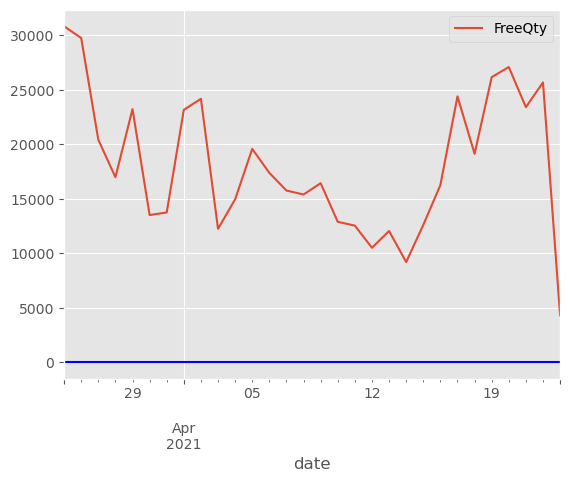

In [11]:
merge.plot(x = 'date' , y = 'FreeQty')
plt.axhline(y=0, color='blue', linestyle='-')

## Думаю, заметно, что товарных остатков меньше 0 нет

## Посчитаю наконец-то среднедневные продажи за последние 30 дней

In [12]:
merge['Qty_Sold'].mean().round(2) 

46.37

## Ответ: 46, 37 - округлил до 2 знаков

# Задача 2: почему-то не получалось считать csv, поэтому перевел в формат xlsx и прочитал :)
## 1.Посчитать коэффициенты сезонности товарной группы для каждого месяца, результат вывести в виде сводной таблицы
## 2.	Определить типы сезонности (например, выраженная/умеренная сезонность и т.д.), описать критерии группировки товаров по каждому из этих типов
## 3.	Разбить категории товаров по типу сезонности, вывести категории товаров, относящиеся к каждому из типов по отдельности
## 4.	Вывести графики сезонных коэффициентов в зависимости от месяца для 5 товарных групп внутри каждого типа сезонности


In [13]:
seasonality = pd.read_excel('Seasonality.xlsx')

In [14]:
seasonality

,date,Qty_Sold,Cat_Name
0,2019-06-28,280,Аксесуары для рыбалки
1,2019-07-02,64,Ягоды свежие
2,2019-07-28,167,Домашняя одежда женская
3,2019-09-18,49,Галантерея мужская
4,2019-06-01,209,Уход за животными
...,...,...,...
279926,2019-05-14,744,Аксессуары для ванной комнаты
279927,2019-10-15,1,"Насос, игла для спортивного мяча"
279928,2019-04-03,149,Менеджмент и управление
279929,2019-09-28,475,Мыло хозяйственное


In [15]:
seasonality.dtypes ## date уже в форматеу datetime, удобно

date        datetime64[ns]
Qty_Sold             int64
Cat_Name            object
dtype: object

|Спецификатор|Описание|
|:------|:---------------------------------------|
| %B   | Полное название месяца                |

In [16]:
seasonality['month'] = seasonality['date'].dt.strftime('%B')# вытаскиваю наименование месяца из даты

In [17]:
seasonality

,date,Qty_Sold,Cat_Name,month
0,2019-06-28,280,Аксесуары для рыбалки,June
1,2019-07-02,64,Ягоды свежие,July
2,2019-07-28,167,Домашняя одежда женская,July
3,2019-09-18,49,Галантерея мужская,September
4,2019-06-01,209,Уход за животными,June
...,...,...,...,...
279926,2019-05-14,744,Аксессуары для ванной комнаты,May
279927,2019-10-15,1,"Насос, игла для спортивного мяча",October
279928,2019-04-03,149,Менеджмент и управление,April
279929,2019-09-28,475,Мыло хозяйственное,September


## Группирую данные по наименованию категории товара и месяцу, считаю средние продажи товара по месяцу

In [18]:
monthly_sales = seasonality.groupby(['Cat_Name', 'month'])['Qty_Sold'].mean().reset_index()

In [19]:
monthly_sales

,Cat_Name,month,Qty_Sold
0,3D Blu-ray,April,15.633333
1,3D Blu-ray,August,7.645161
2,3D Blu-ray,December,8.548387
3,3D Blu-ray,February,25.392857
4,3D Blu-ray,January,11.193548
...,...,...,...
10244,"Ящик, коробка рыболовные",March,7.193548
10245,"Ящик, коробка рыболовные",May,15.774194
10246,"Ящик, коробка рыболовные",November,19.400000
10247,"Ящик, коробка рыболовные",October,13.709677


## Считаю средние продажи товара по году

In [20]:
avg_sales = seasonality.groupby('Cat_Name')['Qty_Sold'].mean().reset_index()

In [21]:
avg_sales 

,Cat_Name,Qty_Sold
0,3D Blu-ray,12.476584
1,Audio CD,389.090411
2,Audio MC (кассета),1.142857
3,Audio/video кассеты,1.000000
4,Blu-ray,159.309589
...,...,...
907,Эхолоты,10.314917
908,Ювелирные часы,1.583333
909,Ягоды свежие,15.320000
910,Яйцо пищевое,82.868493


## Делаю джоин по категории товара, всегда прописываю how = 'left', потому что по умолчанию стоит inner, который может привести к потере данных, добавляю суффиксы, чтобы не запутаться

In [22]:
seasonal_data = monthly_sales.merge(avg_sales, on='Cat_Name', how = 'left' , suffixes=('_monthly', '_avg_year'))

In [23]:
seasonal_data

,Cat_Name,month,Qty_Sold_monthly,Qty_Sold_avg_year
0,3D Blu-ray,April,15.633333,12.476584
1,3D Blu-ray,August,7.645161,12.476584
2,3D Blu-ray,December,8.548387,12.476584
3,3D Blu-ray,February,25.392857,12.476584
4,3D Blu-ray,January,11.193548,12.476584
...,...,...,...,...
10244,"Ящик, коробка рыболовные",March,7.193548,19.161644
10245,"Ящик, коробка рыболовные",May,15.774194,19.161644
10246,"Ящик, коробка рыболовные",November,19.400000,19.161644
10247,"Ящик, коробка рыболовные",October,13.709677,19.161644


## Добавляю новую фичу - коэффициент сезонности, который рассчитывается как отношение месячных продаж товара к продажам в среднем по году

In [24]:
seasonal_data['seasonal_coefficient'] = seasonal_data['Qty_Sold_monthly'] / seasonal_data['Qty_Sold_avg_year']

In [25]:
seasonal_data

,Cat_Name,month,Qty_Sold_monthly,Qty_Sold_avg_year,seasonal_coefficient
0,3D Blu-ray,April,15.633333,12.476584,1.253014
1,3D Blu-ray,August,7.645161,12.476584,0.612761
2,3D Blu-ray,December,8.548387,12.476584,0.685154
3,3D Blu-ray,February,25.392857,12.476584,2.035241
4,3D Blu-ray,January,11.193548,12.476584,0.897165
...,...,...,...,...,...
10244,"Ящик, коробка рыболовные",March,7.193548,19.161644,0.375414
10245,"Ящик, коробка рыболовные",May,15.774194,19.161644,0.823217
10246,"Ящик, коробка рыболовные",November,19.400000,19.161644,1.012439
10247,"Ящик, коробка рыболовные",October,13.709677,19.161644,0.715475


In [26]:
pivot_seasonality = seasonal_data.pivot(index='Cat_Name', columns='month', values='seasonal_coefficient')

## Результат выполнения задачи 1 - сводная таблица, в строках наименование товара, в столбцах месяцы, наличие Nan = нет данных по этому товару в этом месяце, но мне не нравится, что месяца отсортировались в порядке возрастания от а до я, поэтому применю классический прием из BI - создам свой собственный сортировочный список, в котором укажу нужную мне последовательность и по ней отсортирую сводную таблицу

In [27]:
pivot_seasonality

month,April,August,December,February,January,July,June,March,May,November,October,September
Cat_Name,,,,,,,,,,,,
3D Blu-ray,1.253014,0.612761,0.685154,2.035241,0.897165,0.894579,0.844248,1.848624,0.713595,0.748989,0.866139,0.666075
Audio CD,1.021014,0.880300,0.895969,2.035517,0.800544,0.869936,0.997369,1.008887,0.899948,0.661629,1.062694,0.954620
Audio MC (кассета),0.875000,1.000000,0.875000,1.020833,1.050000,1.093750,0.875000,0.954545,0.875000,0.875000,1.125000,1.312500
Audio/video кассеты,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
Blu-ray,1.214616,0.684202,0.712146,1.797713,0.917467,0.783016,0.785891,1.700483,0.847812,0.869376,1.032884,0.718308
...,...,...,...,...,...,...,...,...,...,...,...,...
Эхолоты,0.591377,1.038271,2.242290,1.141820,1.038271,0.922560,0.740029,0.544909,0.497244,1.324942,1.013252,0.878986
Ювелирные часы,1.894737,0.631579,1.105263,NaN,NaN,1.010526,0.631579,NaN,NaN,0.965944,0.631579,1.263158
Ягоды свежие,0.815927,1.212836,1.079199,1.284502,0.430809,2.383559,1.429504,1.132822,0.663270,0.192984,0.253264,0.781114


In [28]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

In [29]:
pivot_seasonality = pivot_seasonality[months_order]

In [30]:
pivot_seasonality

month,January,February,March,April,May,June,July,August,September,October,November,December
Cat_Name,,,,,,,,,,,,
3D Blu-ray,0.897165,2.035241,1.848624,1.253014,0.713595,0.844248,0.894579,0.612761,0.666075,0.866139,0.748989,0.685154
Audio CD,0.800544,2.035517,1.008887,1.021014,0.899948,0.997369,0.869936,0.880300,0.954620,1.062694,0.661629,0.895969
Audio MC (кассета),1.050000,1.020833,0.954545,0.875000,0.875000,0.875000,1.093750,1.000000,1.312500,1.125000,0.875000,0.875000
Audio/video кассеты,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blu-ray,0.917467,1.797713,1.700483,1.214616,0.847812,0.785891,0.783016,0.684202,0.718308,1.032884,0.869376,0.712146
...,...,...,...,...,...,...,...,...,...,...,...,...
Эхолоты,1.038271,1.141820,0.544909,0.591377,0.497244,0.740029,0.922560,1.038271,0.878986,1.013252,1.324942,2.242290
Ювелирные часы,NaN,NaN,NaN,1.894737,NaN,0.631579,1.010526,0.631579,1.263158,0.631579,0.965944,1.105263
Ягоды свежие,0.430809,1.284502,1.132822,0.815927,0.663270,1.429504,2.383559,1.212836,0.781114,0.253264,0.192984,1.079199


## 2.	Определить типы сезонности (например, выраженная/умеренная сезонность и т.д.), описать критерии группировки товаров по каждому из этих типов

<img src = 'tablitsa-1-1024x556.png'/>

[Взято из статьи ПСБ](https://psblog.ru/sezonnost-v-prodazhah-kak-eto-ustroeno/)

## 3. Разбить категории товаров по типу сезонности, вывести категории товаров, относящиеся к каждому из типов по отдельности

## Создаю новую фичу колебание: стандартное отклонение / среднее

In [31]:
pivot_seasonality['колебание'] = (pivot_seasonality.std(axis=1) / pivot_seasonality.mean(axis=1)) * 100

C:\Users\andre\AppData\Local\Temp\ipykernel_16476\317595083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_seasonality['колебание'] = (pivot_seasonality.std(axis=1) / pivot_seasonality.mean(axis=1)) * 100


In [32]:
pivot_seasonality

month,January,February,March,April,May,June,July,August,September,October,November,December,колебание
Cat_Name,,,,,,,,,,,,,
3D Blu-ray,0.897165,2.035241,1.848624,1.253014,0.713595,0.844248,0.894579,0.612761,0.666075,0.866139,0.748989,0.685154,46.697688
Audio CD,0.800544,2.035517,1.008887,1.021014,0.899948,0.997369,0.869936,0.880300,0.954620,1.062694,0.661629,0.895969,33.922273
Audio MC (кассета),1.050000,1.020833,0.954545,0.875000,0.875000,0.875000,1.093750,1.000000,1.312500,1.125000,0.875000,0.875000,13.723232
Audio/video кассеты,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Blu-ray,0.917467,1.797713,1.700483,1.214616,0.847812,0.785891,0.783016,0.684202,0.718308,1.032884,0.869376,0.712146,37.647526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Эхолоты,1.038271,1.141820,0.544909,0.591377,0.497244,0.740029,0.922560,1.038271,0.878986,1.013252,1.324942,2.242290,46.685616
Ювелирные часы,NaN,NaN,NaN,1.894737,NaN,0.631579,1.010526,0.631579,1.263158,0.631579,0.965944,1.105263,42.171967
Ягоды свежие,0.430809,1.284502,1.132822,0.815927,0.663270,1.429504,2.383559,1.212836,0.781114,0.253264,0.192984,1.079199,61.807321


## Новая фича - тип сезонности, она зависит от фичи колебания, расставляю границы в соответствии с таблицей

In [33]:
pivot_seasonality['seasonality_type'] = pd.cut(pivot_seasonality['колебание'],
                                                bins=[0, 20, 50, 100], # процент колебаний
                                                labels=['Умеренная', 'Яркая', 'Жесткая'], # наименование категорий
                                                right=False) 

C:\Users\andre\AppData\Local\Temp\ipykernel_16476\1997696756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_seasonality['seasonality_type'] = pd.cut(pivot_seasonality['колебание'],


In [34]:
pivot_seasonality = pivot_seasonality.reset_index()

In [35]:
pivot_seasonality

month,Cat_Name,January,February,March,April,May,June,July,August,September,October,November,December,колебание,seasonality_type
0,3D Blu-ray,0.897165,2.035241,1.848624,1.253014,0.713595,0.844248,0.894579,0.612761,0.666075,0.866139,0.748989,0.685154,46.697688,Яркая
1,Audio CD,0.800544,2.035517,1.008887,1.021014,0.899948,0.997369,0.869936,0.880300,0.954620,1.062694,0.661629,0.895969,33.922273,Яркая
2,Audio MC (кассета),1.050000,1.020833,0.954545,0.875000,0.875000,0.875000,1.093750,1.000000,1.312500,1.125000,0.875000,0.875000,13.723232,Умеренная
3,Audio/video кассеты,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,Умеренная
4,Blu-ray,0.917467,1.797713,1.700483,1.214616,0.847812,0.785891,0.783016,0.684202,0.718308,1.032884,0.869376,0.712146,37.647526,Яркая
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,Эхолоты,1.038271,1.141820,0.544909,0.591377,0.497244,0.740029,0.922560,1.038271,0.878986,1.013252,1.324942,2.242290,46.685616,Яркая
908,Ювелирные часы,NaN,NaN,NaN,1.894737,NaN,0.631579,1.010526,0.631579,1.263158,0.631579,0.965944,1.105263,42.171967,Яркая
909,Ягоды свежие,0.430809,1.284502,1.132822,0.815927,0.663270,1.429504,2.383559,1.212836,0.781114,0.253264,0.192984,1.079199,61.807321,Жесткая
910,Яйцо пищевое,0.417685,0.757224,1.566415,1.386534,0.892592,0.866433,0.905048,0.893760,1.036984,1.017547,1.203111,1.049078,29.611096,Яркая


## К сожалению, почему-то не получилось вывести красиво датафрейм как при группировке в SQL, поэтому есть два варианта...

In [36]:
cat_df = pivot_seasonality.groupby('seasonality_type')['Cat_Name'].apply(list).reset_index()

## Вариант 1

In [37]:
cat_df

,seasonality_type,Cat_Name
0,Умеренная,"[Audio MC (кассета), Audio/video кассеты, Blu-..."
1,Яркая,"[3D Blu-ray, Audio CD, Blu-ray, Blu-ray Audio,..."
2,Жесткая,"[Blu-ray с дополнениями, LP + CD, LP + DVD, А..."


## Вариант 2

In [38]:
cat_df = cat_df.explode('Cat_Name').reset_index(drop=True)
cat_df

,seasonality_type,Cat_Name
0,Умеренная,Audio MC (кассета)
1,Умеренная,Audio/video кассеты
2,Умеренная,Blu-ray+CD
3,Умеренная,CD+MP3 Audio
4,Умеренная,USB
...,...,...
848,Жесткая,Энергетические напитки
849,Жесткая,Эротические белье и обувь
850,Жесткая,"Эротические сувенир, игра"
851,Жесткая,Эротический аксессуар


## 4.Вывести графики сезонных коэффициентов в зависимости от месяца для 5 товарных групп внутри каждого типа сезонности

In [39]:
pivot_seasonality

month,Cat_Name,January,February,March,April,May,June,July,August,September,October,November,December,колебание,seasonality_type
0,3D Blu-ray,0.897165,2.035241,1.848624,1.253014,0.713595,0.844248,0.894579,0.612761,0.666075,0.866139,0.748989,0.685154,46.697688,Яркая
1,Audio CD,0.800544,2.035517,1.008887,1.021014,0.899948,0.997369,0.869936,0.880300,0.954620,1.062694,0.661629,0.895969,33.922273,Яркая
2,Audio MC (кассета),1.050000,1.020833,0.954545,0.875000,0.875000,0.875000,1.093750,1.000000,1.312500,1.125000,0.875000,0.875000,13.723232,Умеренная
3,Audio/video кассеты,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,Умеренная
4,Blu-ray,0.917467,1.797713,1.700483,1.214616,0.847812,0.785891,0.783016,0.684202,0.718308,1.032884,0.869376,0.712146,37.647526,Яркая
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,Эхолоты,1.038271,1.141820,0.544909,0.591377,0.497244,0.740029,0.922560,1.038271,0.878986,1.013252,1.324942,2.242290,46.685616,Яркая
908,Ювелирные часы,NaN,NaN,NaN,1.894737,NaN,0.631579,1.010526,0.631579,1.263158,0.631579,0.965944,1.105263,42.171967,Яркая
909,Ягоды свежие,0.430809,1.284502,1.132822,0.815927,0.663270,1.429504,2.383559,1.212836,0.781114,0.253264,0.192984,1.079199,61.807321,Жесткая
910,Яйцо пищевое,0.417685,0.757224,1.566415,1.386534,0.892592,0.866433,0.905048,0.893760,1.036984,1.017547,1.203111,1.049078,29.611096,Яркая


## Поскольку в условии сказано, что могу вывести любые товары, то просто дропну те, где есть NaN, чтобы облегчить себе жизнь, отсортирую их по убыванию внутри группы и возьму первые 5

In [40]:
pivot_seasonality_dropna = pivot_seasonality.dropna()
pivot_seasonality_drona_sorted = pivot_seasonality_dropna.sort_values(['seasonality_type', 'колебание'], ascending=[True, False])
top_groups_by_seasonality_dropna = pivot_seasonality_drona_sorted.groupby('seasonality_type').head(5)

In [41]:
top_groups_by_seasonality_dropna

month,Cat_Name,January,February,March,April,May,June,July,August,September,October,November,December,колебание,seasonality_type
393,Компьютерное чистящее средство,0.918713,1.134652,1.132843,1.306444,1.372297,0.878146,0.948132,0.775338,0.770783,0.798800,1.014755,0.961166,19.926392,Умеренная
183,Восточные сладости,0.652457,1.149747,0.825940,1.105008,1.075115,0.956089,1.195161,1.193950,0.972670,0.703927,0.924647,1.258439,19.719210,Умеренная
376,Комиксы IDW Publishing,1.448307,1.336898,1.050420,1.002674,0.935829,0.935829,0.811688,0.911522,0.816993,0.868984,0.946970,0.954927,19.599041,Умеренная
421,Кузовные детали,0.666630,0.864634,0.953333,0.854248,1.217171,1.301364,1.051833,0.828450,0.925132,0.928708,1.183224,1.220689,19.452962,Умеренная
276,"Зоокорм, витамины для кошек и собак",0.715038,0.863826,0.832318,0.870114,0.910031,0.886491,0.986309,1.069368,1.076762,1.173895,1.384813,1.224895,19.209742,Умеренная
758,Средства реабилитации,0.371839,0.445309,0.443064,0.632091,0.688163,0.900513,1.084093,1.300912,1.252276,1.367947,1.518533,1.951368,49.958667,Яркая
755,Средства для бритья мужские,0.558097,1.549893,0.705214,0.763177,0.714374,0.752218,0.747959,0.733898,0.836988,1.046452,1.330413,2.304300,49.884042,Яркая
15,Hi-Fi TV&Audio,0.835224,0.576695,0.694585,0.857134,0.754859,1.026188,0.895498,0.706066,0.714772,1.033267,1.465135,2.387996,49.791241,Яркая
89,Аудиокнига,1.039857,2.412922,1.525520,0.985942,0.854438,0.870604,0.878504,0.762302,0.728503,0.740987,0.685162,0.628452,49.626343,Яркая
347,Книги: Приключения,0.534851,0.795300,0.534390,0.612039,0.653282,0.718360,0.832246,0.805965,1.077540,1.393200,1.524324,2.089799,49.427311,Яркая


## Поскольку из датафрейма криво доставались наименования месяцев, то пришлось сделать немного костыльно

In [42]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
seasonality_types = top_groups_by_seasonality_dropna['seasonality_type'].unique()

## Код для отрисовки графиков

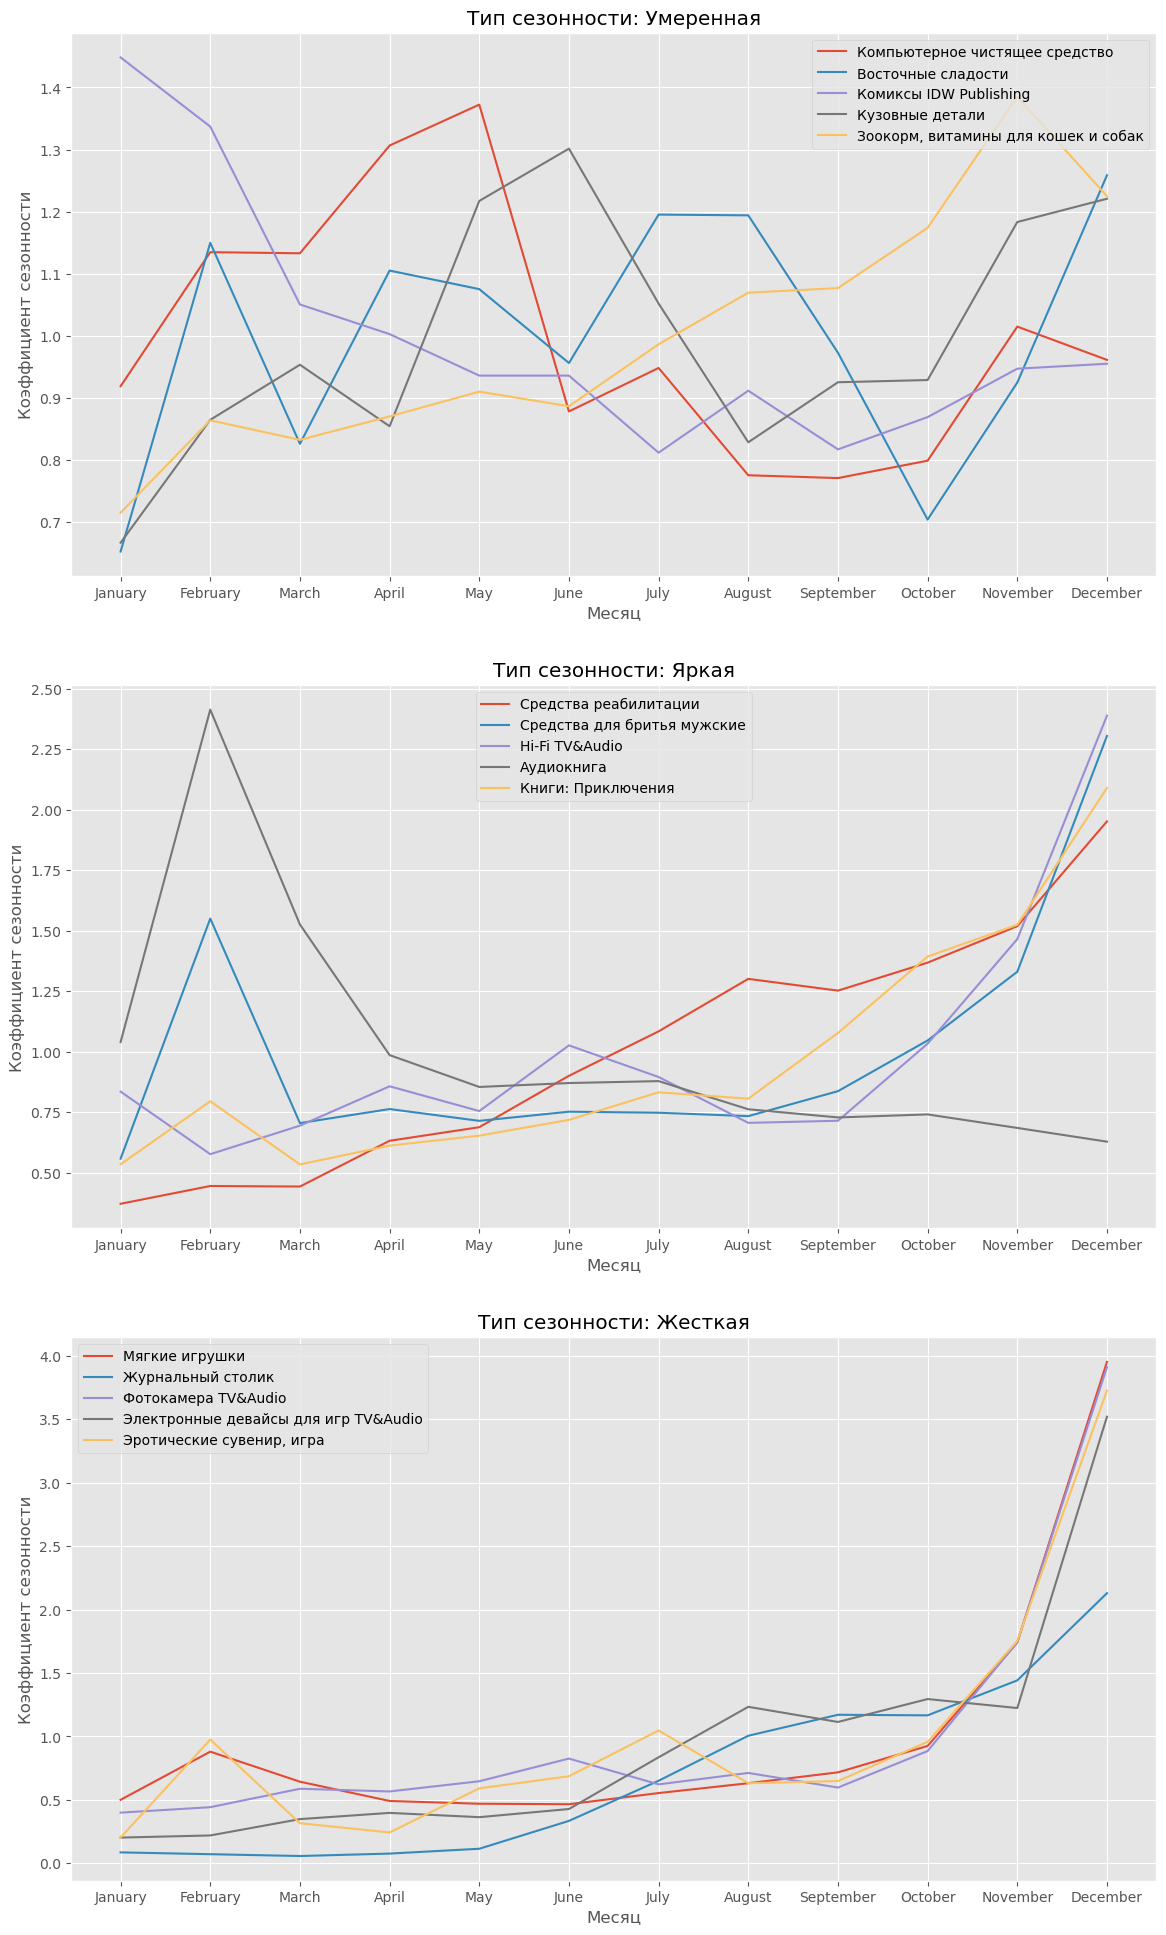

In [43]:
fig, axs = plt.subplots(len(seasonality_types), figsize=(14, 8 * len(seasonality_types)))
for i, seasonality in enumerate(seasonality_types):
    data_to_plot = top_groups_by_seasonality_dropna[top_groups_by_seasonality_dropna['seasonality_type'] == seasonality]
    for index, row in data_to_plot.iterrows():
        if len(seasonality_types) > 1:
            ax = axs[i]
        else:
            ax = axs
        ax.plot(months, row[months].values, label=row['Cat_Name'])
        ax.set_title(f'Тип сезонности: {seasonality}')
        ax.set_xlabel('Месяц')
        ax.set_ylabel('Коэффициент сезонности')
        ax.legend()

## Задание 3
## Напишите программу, которая принимает на вход значения трёх стандартных цветов (синий, красный, зелёный) и выводит результат их смешивания. Программа должна выдавать результат в виде строки цвет1 + цвет2 = цвет3 и уметь обрабатывать ошибки

## Напишу функцию, которая на вход принимает 2 цвета, определю все нужные мне комбинации НОВЫХ цветов в теле функции, поскольку мне не важен порядок, ведь синий + красный == красный + синий, то общее количество нужных комбинаций = Число сочетаний из трёх по два (из трёх цветов в комбинации по 2) и это число равно 3. 
## Также нужно учесть, что смешивание одного и того же цвета не приведет к созданию нового, но и не должно вызвать ошибку, также нужно учитывать написание цветов(ВОТ ТАК, или вот так, или даже ВоТ тАк)

In [44]:
def mix_colors(color1, color2):
    color_combinations = {
        frozenset(['красный', 'синий']): 'фиолетовый',
        frozenset(['красный', 'зелёный']): 'жёлтый',
        frozenset(['синий', 'зелёный']): 'голубой',
    }
    if color1.lower() == color2.lower():
        return f'{color1.capitalize()} + {color2.capitalize()} = {color1.capitalize()}'
    
    result_color = color_combinations.get(frozenset([color1.lower(), color2.lower()]))
    
    if result_color:
        return f'{color1.capitalize()} + {color2.capitalize()} = {result_color.capitalize()}'
    else:
        return 'Ошибка:Введены некорректные значения:('

## Тестируемся

In [45]:
print(mix_colors('синий', 'красный')) # самый обычный вариант
print(mix_colors('красный', 'синий')) # меняем местами
print(mix_colors('КрАсНый', 'синий')) # очень странно пишем...
print(mix_colors('красный', 'красный')) # смешиваем два одинаковых цвета
print(mix_colors('оранжевый', 'синий'))  # выбираем несуществующий цвет

Синий + Красный = Фиолетовый
Красный + Синий = Фиолетовый
Красный + Синий = Фиолетовый
Красный + Красный = Красный
Ошибка:Введены некорректные значения:(


## Напишите программу, которая запрашивает у пользователя ввод натурального числа, рассчитывает для него Факториал, а из получившегося значения выводит только нечётные цифры. Программа должна уметь обрабатывать все возможные ошибки. 
### Пример: ввели число 6. Факториал для 6 равно 720. В результате выводим 7.

## Функция для факториала

In [46]:
def calculate_factorial(n):
    if n == 0:
        return 1
    else:
        result = 1
        for i in range(1, n + 1):
            result *= i
        return result

In [47]:
calculate_factorial(6)

720

## Теперь функцию для того, чтобы доставать нечетные числа: пробегаемся циклом фор для каждого элемента внутри числа: для этого преобразовываем число в строку, из него достаём элементы, преобразовываем обратно в целое, сравниваем остаток от деления на 2 с нулём

In [48]:
def extract_odd_digits(number):
    return ''.join(digit for digit in str(number) if int(digit) % 2 != 0)

## Теперь напишем функцию, которая будет представлять собой комбинацию двух, уже написанных ранее функций: внутри тела функции считаем число фибоначчи, достаём из него нечетные цифры, учитвыаем, что числа, подаваемые на вход - натуральные!

In [49]:
def main():
    try:
        user_input = input("Введите натуральное число: ")
        n = int(user_input)
        if n < 0:
            raise ValueError("Число должно быть натуральным (неотрицательным)")
        
        fibonacci_number = calculate_factorial(n)
        result = extract_odd_digits(fibonacci_number)
        
        if result:
            print(f"Нечётные цифры числа факториала для {n}: {result}")
        else:
            print(f"Для числа факториала {n} нечётные цифры отсутствуют")
    except ValueError as e:
        print(f"Ошибка: {e}")
    except Exception as e:
        print(f"Неизвестная ошибка: {e}")

In [50]:
main()

Введите натуральное число: 6
Нечётные цифры числа факториала для 6: 7
